<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_Week_3_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSESSMENT QUESTION**

Hypothyroidism is a condition where the thyroid gland does not produce enough thyroid hormone. Thyroid hormone plays crucial roles in digestion, heart and muscle function, brain development and maintenance of bones. Deficiency in Thyroid hormone disrupts the body temperature, heart rate and other body metabolism. Some of the symptoms inlude cold sensitivity, fatigue and weight gain. In our report we will focus on a patient's body symptoms and predict whether he or she is suffering from hypothyroidism. The dataset that we are going to use can be found [here.](http://bit.ly/hypothyroid_data)

**DEFINING THE QUESTION**

Our prediction is a binary classification which involves classifying whether a patient has hypothyroid or whether a patient does **not** have hypothyroid. In order to make our predictions, we will be using 25 key variables to show how they influence our prediction of whether or not a patient has hypothyroid. On top of that, we will also look at the key variables that are vital in making our prediction.

**DEFINING THE METRIC FOR SUCCESS**

We will focus on creating visualizations to get insights of how each variable affects the target variable and also the variables which give us the highest information gain. We will also look at the different classification models and pick the best one to make our classifications with. In our case, we will look for the model with an accuracy score **not** very close to **100%** but also not smaller than **80%**.

**UNDERSTANDING THE CONTEXT**

We are going to use one dataset. The hypothyroid dataset gives different patient symptoms and a diagnosis of whether or not a patient is suffering from hypothyroidism. The dataset we are using has a total of 26 columns, one of which we will use as our target variable (the 'status' column). We will use the remaining columns as our independent variables.

**EXPERIMENTAL DESIGN**

We expect the following work flow:

* Data preparation
 * Loading our libraries and dataset.
 * Dealing with missing values.
* Perform Exploratory Data Analysis.
* Creating a Random Forest.
* Creating a Gradient Boost tree.
* Data cleaning
 * Checking and dealing with duplicated records.
 * Checking for outliers.
* Building Support Vector Machines
 * Linear kernel.
 * Polynomial kernel.
 * Radial Basis Function kernel.
* Conclusion.


**DATA RELEVANCE**

* Age - the age of each patient
* Sex - whether the patient is male or female
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant - whether the patient is pregnant
* sick -whether the patient is sick.
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4
* T4U_measured	
* T4U	
* FTI_measured	
* FTI	
* TBG_measured	
* TBG

In [1]:
# Importing our libraries.
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading our dataset.

df=pd.read_csv('/content/hypothyroid.csv')
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [5]:
# Splitting categorical columns from numerical columns so that we can encode the values in the categorical columns.

from sklearn.preprocessing import LabelEncoder

categorical=df[['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']]
categorical.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n


In [6]:
# Encoding all categorical columns.

encoded=categorical.apply(LabelEncoder().fit_transform)

In [7]:
encoded.head(2)

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


Our numerical columns are objects instead of integers. We therefore need to convert them to integers. However, when we try to do that, it gives us an error because we have value '?' in all of our numerical columns which cannot be converted to an integer. To get around this error, we can use Pandas 'to_numeric' function with 'errors='coerce' as an argument.

In [8]:
# Separating our numerical columns from the categorical columns.

numerical=df.drop(['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=1)

In [9]:
# Previewing the top of our numerical dataset.

numerical.head()

,age,TSH,T3,TT4,T4U,FTI,TBG
0,72,30,0.60,15,1.48,10,?
1,15,145,1.70,19,1.13,17,?
2,24,0,0.20,4,1,0,?
3,24,430,0.40,6,1.04,6,?
4,77,7.30,1.20,57,1.28,44,?


In [10]:
# Converting our numerical columns to integers.

numerical['age'] = pd.to_numeric(numerical['age'], errors='coerce')
numerical['TSH']= pd.to_numeric(numerical['TSH'], errors='coerce')
numerical['T3'] = pd.to_numeric(numerical['T3'], errors='coerce')
numerical['TT4'] = pd.to_numeric(numerical['TT4'], errors='coerce')
numerical['T4U'] = pd.to_numeric(numerical['T4U'], errors='coerce')
numerical['FTI'] = pd.to_numeric(numerical['FTI'], errors='coerce')
numerical['TBG'] = pd.to_numeric(numerical['TBG'], errors='coerce')

In [11]:
numerical.isnull().sum()

age     446
TSH     468
T3      695
TT4     249
T4U     248
FTI     247
TBG    2903
dtype: int64

We find that by converting the columns to integers, we get a lot of null values in our columns which came from the '?' values. We cannot drop them because they cover a large proportion of our data. I find that the best way to fill the missing values is by replacing them with the mean value in their respective columns.

In [12]:
# Filling each missing value in each column with the mean value of their respective columns.

numerical['age']=numerical['age'].fillna(numerical['age'].mean()).astype('int')
numerical['TSH']=numerical['TSH'].fillna(numerical['TSH'].mean()).astype('int')
numerical['T3']=numerical['T3'].fillna(numerical['T3'].mean()).astype('int')
numerical['TT4']=numerical['TT4'].fillna(numerical['TT4'].mean()).astype('int')
numerical['T4U']=numerical['T4U'].fillna(numerical['T4U'].mean()).astype('int')
numerical['FTI']=numerical['FTI'].fillna(numerical['FTI'].mean()).astype('int')
numerical['TBG']=numerical['TBG'].fillna(numerical['TBG'].mean()).astype('int')

In [13]:
numerical.isnull().sum()

# The missing values have been succesfully replaced.

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
TBG    0
dtype: int64

In [14]:
# Joining the two datasets

df_final=encoded.join(numerical)
df_final.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,age,TSH,T3,TT4,T4U,FTI,TBG
0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,72,30,0,15,1,10,31
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,15,145,1,19,1,17,31
2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,24,0,0,4,1,0,31
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,24,430,0,6,1,6,31
4,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,77,7,1,57,1,44,31


In [15]:
# Checking the data types of our columns

df_final.dtypes

status                       int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
T3_measured                  int64
TT4_measured                 int64
T4U_measured                 int64
FTI_measured                 int64
TBG_measured                 int64
age                          int64
TSH                          int64
T3                           int64
TT4                          int64
T4U                          int64
FTI                          int64
TBG                          int64
dtype: object

**RANDOM FOREST**

What Random Forest does is combine the simplicity of Decision Trees with flexibility. Flexibility improves the accuracy of our model whereby we can still use the model when it comes to classifying new samples. Random Forest uses a boostrapped dataset which is created from randomly selecting samples from the original dataset. The same samples can be selected more than once.

Since this is a classification, we are going to use a random forest classifier.

In [16]:
# Importing the libraries.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Separating the dependent variable and the independent variables.

X=df_final.drop('status',axis=1).values
y=df_final['status'].values

# Creating a list of our test features
features=df_final.columns.to_list()
features.remove('status')

# Separating our train and test sets and testing 20% of our data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Before training our model, we need to establish the best parameters we are going to use to optimize our model's performance. We can find the best parameters by performing grid search.

In [18]:
from sklearn.model_selection import GridSearchCV

# Creating a parameter grid of the best parameters we want to look for.
param_grid = {
    'bootstrap':[True],
    'max_depth': [5,6,7,8],
    'max_features': [2, 3],
    'min_samples_split': [10,20,30],
    'n_estimators': [100, 200, 300]
}

forest=RandomForestClassifier(random_state=42)

# Building our grid search model to find the best parameters.
CV_forest = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 5)
CV_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [5, 6, 7, 8], 'max_features': [2, 3], 'min_samples_split': [10, 20, 30], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
# Now to look for the best parameters we are going to use in our model.

CV_forest.best_params_


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [20]:
# Fitting the best parameters in our random forest

rforest = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split = 10, max_depth=7,max_features=3)
rforest = rforest.fit(X_train, y_train)

In [21]:
# Predicting using our trained model

y_pred=rforest.predict(X_test)

comparison=pd.DataFrame({'Actual': y_test.flatten(),'Prediction':y_pred.flatten()})
comparison


,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
628,1,1
629,1,1
630,1,1
631,1,1


In [22]:
print(accuracy_score(y_test,y_pred))

0.9826224328593997


Our Random Forest gives us a really high accuracy score of about **98.3%**. Even though Random Forests are set to improve our model accuracy, we cannot rule out the possibility that our model is overfitting our training set. 

In [23]:
print(confusion_matrix(y_test,y_pred))

[[ 27  10]
 [  1 595]]


11 of our total data points have been incorrectly prdicted while 622 have been correctly predicted. Even though not 100% accurate, a good number of correct predictions have been made.

In [24]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


Our RMSE is about 13%. Our predictions range from 0 to 1. Not a very big gap between our minimum and maximum range, but an RMSE of 13% is still pretty good.

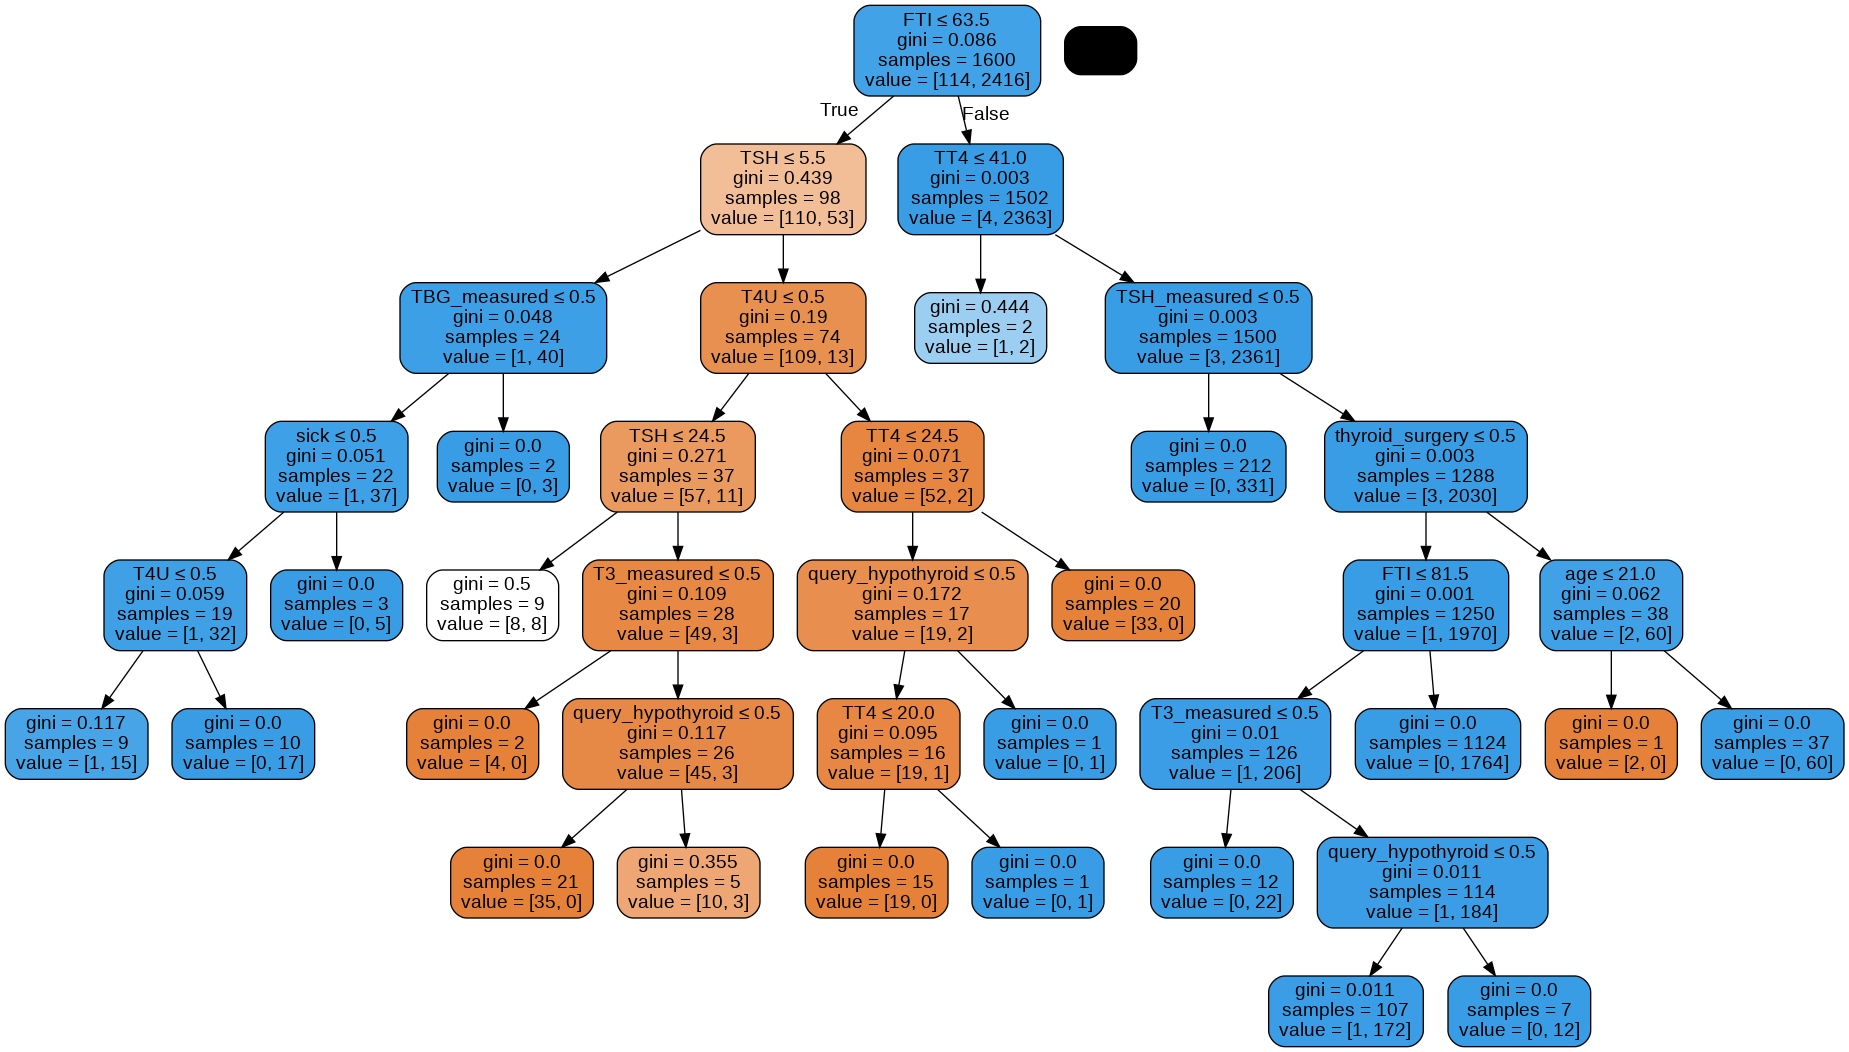

In [25]:
# Lets look at how 50 trees in our random forest look loke to determine which features are the most important in determining if someone has hypothyroid.

from sklearn.tree import export_graphviz
!pip install --upgrade scikit-learn==0.20.3
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree = rforest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

From our random forest, we can see that we have meaningful information gain because on the left side, majority of the nodes are orange indicating one class and a few blue nodes indicating a different class and on the right side of our tree most of the tree nodes are blue nodes.

In [26]:
# Let us find the numerical features that are important.
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Sorting the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('T3_measured', 0.0), ('TT4_measured', 0.0), ('T4U_measured', 0.0), ('FTI_measured', 0.0), ('TBG_measured', 0.0), ('age', 0.02), ('TSH', 0.26), ('T3', 0.0), ('TT4', 0.01), ('T4U', 0.01), ('FTI', 0.69), ('TBG', 0.0)]

Variable: FTI                  Importance: 0.69
Variable: TSH                  Importance: 0.26
Variable: age                  Importance: 0.02
Variable: query_hypothyroid    Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variabl

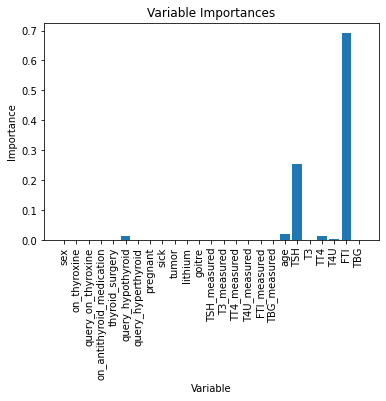

In [27]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Creating a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the visualisation, we can see that most of the features are not vital in our classification. The best features to use are FTI and TSH.

**GRADIENT BOOST**

In [28]:
# Splitting our dataset.

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X=df_final.drop('status',axis=1).values
y=df_final['status'].values

# Creating a list of our test features
features=df_final.columns.to_list()
features.remove('status')

In [29]:
# Creating our train and test sets.

from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

gb=GradientBoostingClassifier()

# Creating a parameter grid of the best parameters we want to look for.
param_grid = {
    'max_depth': [4,5,6],
    'learning_rate': [0.3,0.4,0.5],
    'n_estimators': [100,200, 400]
}

# Fit the Grid search model on the training set.
boost=GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
boost.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 6], 'learning_rate': [0.3, 0.4, 0.5], 'n_estimators': [100, 200, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
# Finding the best parameters to use.

boost.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}

In [31]:
# Fitting our Gradient boost model with the best parameters.

gbr = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, max_depth=5)
gbr = gbr.fit(X_train, y_train)

In [32]:
y_pred=gbr.predict(X_test)

In [33]:
comparison=pd.DataFrame({'Actual': y_test.flatten(),'Prediction':y_pred.flatten()})
comparison

,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
628,1,1
629,1,1
630,1,1
631,1,1


In [34]:
# Checking for the accuracy of our model.
print(accuracy_score(y_test,y_pred))

# Checking for the number of correct predictions.
print(confusion_matrix(y_test,y_pred))

0.9873617693522907
[[ 23   3]
 [  5 602]]


Our Gradient Boost tree has a high accuracy score of about **98.7%**. This tree is what we get as our perfect fit.

In [35]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01263823064770932
Mean Squared Error: 0.01263823064770932
Root Mean Squared Error: 0.11241988546386854


It also has a low RMSE of **11.2%**. Using a range of 0 to 1, this is not a bad error to work with.

**SUPPORT VECTOR MACHINES**

In Support Vector Machines are very sensitive to outliers. Outliers can cause a lot of misclassifications and also they tend to cause overfitting since data is noisy. In the kernels we are going to create, we will use a parameter grid with parameters with a small range because using a big range in the parameters is very time consuming. This is one of the disadvantages of Support Vector Machines. In our Support Vector Machine models, we are going to deal with 2 Dimensional data.

From our Random Forest, we see that to classify whether a patient has hypothyroid or not, two columns are vital. The FTI and TSH columns. They are the most impactful in influencing prediction. We are therefore going to use the two columns in our Support Vector Machine.

In [36]:
# Checking for duplicates.

df_final.duplicated().sum()

86

We can see that we have duplicated values in our dataset. Since we are  going to be visualising our data, we do not want different data points overlying each other. We need each data point to be clearly represented on its own position in the visualisation. We are therefore going to drop the duplicates.

In [37]:
# Dropping the duplicates.

df_final.drop_duplicates(inplace=True)
df_final.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


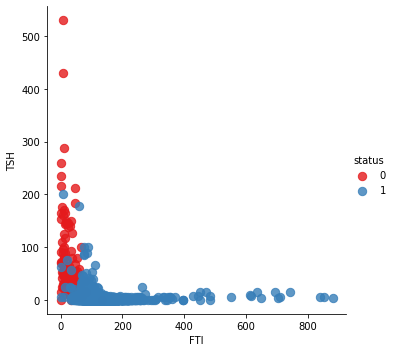

In [38]:
# We are going to use FTI and TSH as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('FTI', 'TSH', data=df_final, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

From our graph we can see that using FTI and TSH as our main columns creates two groups. Red dots represent patients with hypothyroid and the blue dots represent patients without hypothyroid.  

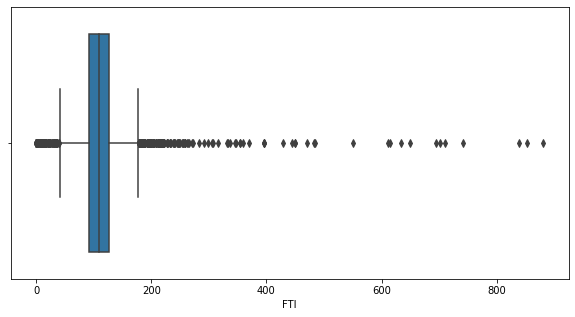

In [39]:
# Checking for outliers

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, x='FTI')

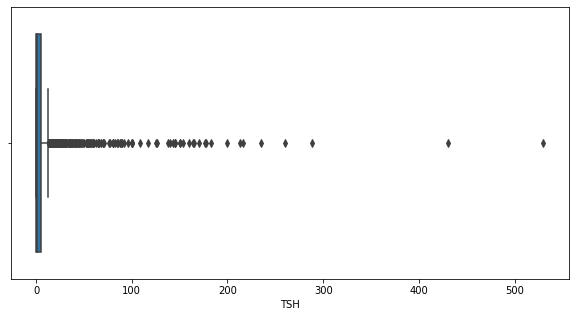

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final,x='TSH')

A large proportion of our dataset has outliers. Removing the outliers will not be ideal in our scenario since we might not have enough data points for our classification and removing the data points might cause underfitting in our model. Plus, Support Vector Machines can deal with outliers by allowing misclassifications.

In [41]:
# Importing our libraries.

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [42]:
# Defining our independent and dependent variables.

X=df_final[['TSH','FTI']]
y=df_final['status']


In [43]:
# Creating our train and test sets.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
df_final.status.unique()

array([0, 1])

In [45]:
# Defining the best parameters.
import warnings
warnings.filterwarnings('ignore')

param_grid = {'C': [2**-5,2**-4,2**0],
              'kernel': ['linear']}

linear_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
linear_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.03125, kernel=linear ........................................
[CV]  C=0.03125, kernel=linear, score=0.9780755176613886, total=   0.0s
[CV] C=0.03125, kernel=linear ........................................
[CV]  C=0.03125, kernel=linear, score=0.9817073170731707, total=   0.0s
[CV] C=0.03125, kernel=linear ........................................
[CV]  C=0.03125, kernel=linear, score=0.9841463414634146, total=   0.0s
[CV] C=0.0625, kernel=linear .........................................
[CV]  C=0.0625, kernel=linear, score=0.9780755176613886, total=   0.0s
[CV] C=0.0625, kernel=linear .........................................
[CV]  C=0.0625, kernel=linear, score=0.9817073170731707, total=   0.0s
[CV] C=0.0625, kernel=linear .........................................
[CV]  C=0.0625, kernel=linear, score=0.9841463414634146, total=   0.0s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, kernel=linear, score=0.9780755176613886, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9817073170731707, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9841463414634146, total=   0.1s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.03125, 0.0625, 1], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [46]:
# Finding the best parameters.

print(linear_grid.best_params_)

{'C': 0.03125, 'kernel': 'linear'}


In [47]:
# Our C parameter will help us decide how much we want to penalize misclassified points. A low C value prioritizes simplicity and with 
# our small C value form our grid search, we expect a lot of misclassifications since a small C parameter produces a soft margin.

Linear=SVC(kernel='linear', C=0.03125)
Linear.fit(X_train,y_train)

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
y_pred=Linear.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9805194805194806
[[ 18  12]
 [  0 586]]


Our Linear kernel an accuracy score of **98%**. Most of the data points have been correctly predicted while a few points have been incorrectly predicted.

**Polynomial kernel**

In [50]:
# Looking for the best parameters to use in our polymial kernel.

param_grid = {'C': [0.01, 1.0],
              'gamma': [0.01, 0.05],
              'kernel': ['poly']}

poly_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# Fitting the grid model to find the best parameters.
poly_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.01, gamma=0.01, kernel=poly .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.976857490864799, total=   1.3s
[CV] C=0.01, gamma=0.01, kernel=poly .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9804878048780488, total=   4.7s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9829268292682927, total=   0.1s
[CV] C=0.01, gamma=0.05, kernel=poly .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV]  C=0.01, gamma=0.05, kernel=poly, score=0.976857490864799, total= 1.7min
[CV] C=0.01, gamma=0.05, kernel=poly .................................
[CV]  C=0.01, gamma=0.05, kernel=poly, score=0.9817073170731707, total=  25.0s
[CV] C=0.01, gamma=0.05, kernel=poly .................................
[CV]  C=0.01, gamma=0.05, kernel=poly, score=0.9829268292682927, total=   3.1s
[CV] C=1.0, gamma=0.01, kernel=poly ..................................
[CV]  C=1.0, gamma=0.01, kernel=poly, score=0.976857490864799, total=  36.6s
[CV] C=1.0, gamma=0.01, kernel=poly ..................................
[CV]  C=1.0, gamma=0.01, kernel=poly, score=0.9804878048780488, total= 1.1min
[CV] C=1.0, gamma=0.01, kernel=poly ..................................
[CV]  C=1.0, gamma=0.01, kernel=poly, score=0.9841463414634146, total=   1.3s
[CV] C=1.0, gamma=0.05, kernel=poly ..................................
[CV]  C=1.0, gamma=0.05, kernel=poly, score=0.9707673568818515, total=10.2min
[CV] C=1.0, gamma=0.05, ker

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 20.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 1.0], 'gamma': [0.01, 0.05], 'kernel': ['poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [51]:
# Finding the best parameters.

print(poly_grid.best_params_)

{'C': 0.01, 'gamma': 0.05, 'kernel': 'poly'}


In [52]:
# Building the polynomial model.
polyclassifier = SVC(kernel='poly',degree=2,gamma=0.05,C=0.01)

# Fitting the polynomial model in our train sets.
polyclassifier.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.05, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_pred=polyclassifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [57]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9837662337662337
[[ 21   9]
 [  1 585]]


Our polynomial kernel has an accuracy score of about **98.4%** and looking at our confusion matrix, most of the data points have been correctly classified.

**RBF kernel**

In [58]:
X=df_final[['TSH','FTI']]
y=df_final['status']


# Creating our train and test sets.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [59]:
param_grid = {'C': [0.001, 0.1 ,1,5],
              'gamma': [0.01, 0.05],
              'kernel': ['rbf']}

rbf_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
rbf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.9549330085261876, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.001, gamma=0.05, kernel=rbf .................................
[CV]  C=0.001, gamma=0.05, kernel=rbf, score=0.9549330085261876, total=   0.0s
[CV] C=0.001, gamma=0.05, kernel=rbf .................................
[CV]  C=0.001, gamma=0.05, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.001, gamma=0.05, kernel=rbf .................................
[CV]  C=0.001, gamma=0.05, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9549330085261876, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.1, gamma=0.05, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.05, kernel=rbf, score=0.9549330085261876, total=   0.0s
[CV] C=0.1, gamma=0.05, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.05, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=0.1, gamma=0.05, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.05, kernel=rbf, score=0.9548780487804878, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9829476248477467, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ....

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.1, 1, 5], 'gamma': [0.01, 0.05], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [60]:
print(rbf_grid.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [61]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma=0.01, C=1)

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
y_pred=rbfclassifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9853896103896104
[[ 22   8]
 [  1 585]]


Our RBF kernel has a high accuracy score of **98.5%** and majority of our data points have been correctly classified while a few have been incorrectly classified.

We are now going to use the best kernel to make our predictions using all the variables and compare the results with using the two major variables. Our rbf kernel has the highest accuracy score. We are therefor going to use this kernel.

In [64]:
X=df_final.drop('status',axis=1)
y=df_final['status']

X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=.2, random_state=42)

In [65]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma=0.01, C=1)

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred=rbfclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9577922077922078
[[  6  24]
 [  2 584]]


Using all the variables in our rbf kernel, the accuracy score drops to about **95.8%**. That is about a **2.7%** drop from our rbf kernel with 2 features. There are more incorrect predictions using more features than when using 2 features.

**CONCLUSION**

Even though using more variables leads to a lower accuracy score than when using the 2 key features, If we intend on picking the best model, we should would go with the **95.7%** accurate model. Using 2 features, our model is nearly **100%** accurate and this tends to overfit our model to the training data. It will not be able to perform well in predicting new data. The model with more variables still has a really high accuracy score, but in this case it will be the best one to go with since it has more bias than the **98.5%** model. It will perform slightly better on unseen data than the model with the higher accuracy.